In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configure plots
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('../data/togo-dapaong_qc.csv')  # or 'togo.csv' / 'benin_clean.csv'

# Display basic info
print("✅ Data loaded successfully!")
print(df.info())

✅ Data loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  T

In [3]:
print("\n🔹 First 5 rows:")
display(df.head())

print("\n🔹 Shape of data:", df.shape)
print("\n🔹 Missing values per column:")
print(df.isnull().sum())


🔹 First 5 rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN



🔹 Shape of data: (525600, 19)

🔹 Missing values per column:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [4]:
df = df.dropna(axis=1, how='all')

# Fill numeric missing values with median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print("\n✅ Missing values handled.")


✅ Missing values handled.


In [5]:
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(df[cols], nan_policy='omit'))
outliers = (z_scores > 3)
outlier_counts = outliers.sum()

print("\n🔹 Outlier count per column:")
print(outlier_counts)

# Optional: remove outliers
df_clean = df[(z_scores < 3).all(axis=1)]
print("\n✅ Cleaned data shape after removing outliers:", df_clean.shape)


🔹 Outlier count per column:
12550

✅ Cleaned data shape after removing outliers: (516349, 18)


In [6]:
print("\n🔹 Summary statistics:")
display(df_clean.describe())

# ==========================================
# Step 7: Correlation analysis
# ==========================================
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


🔹 Summary statistics:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000
mean,223.859675,147.975931,112.781249,219.380751,213.028150,27.727474,55.182807,2.312185,3.154247,0.548049,162.129322,10.491499,975.893919,0.000529,0.000952,32.312313,33.378512
std,317.306277,247.683690,151.571744,311.854841,302.625802,4.757337,28.698318,1.377997,1.762192,0.252824,92.028704,5.915056,2.147358,0.022988,0.018621,10.957090,12.718462
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.800000,1.400000,1.900000,0.400000,74.700000,6.800000,975.000000,0.000000,0.000000,23.800000,23.600000
50%,0.500000,0.000000,1.500000,2.800000,2.800000,27.200000,59.400000,2.200000,2.900000,0.500000,200.200000,10.700000,976.000000,0.000000,0.000000,28.200000,28.200000
75%,423.200000,237.900000,211.600000,404.100000,393.100000,31.000000,81.000000,3.200000,4.100000,0.700000,233.700000,14.000000,977.000000,0.000000,0.000000,40.300000,42.600000
max,1198.000000,904.100000,586.000000,1171.200000,1143.000000,41.400000,99.800000,6.700000,8.800000,2.700000,360.000000,86.900000,983.000000,1.000000,1.800000,70.400000,94.600000


ValueError: could not convert string to float: '2021-10-25 00:01'

<Figure size 800x600 with 0 Axes>

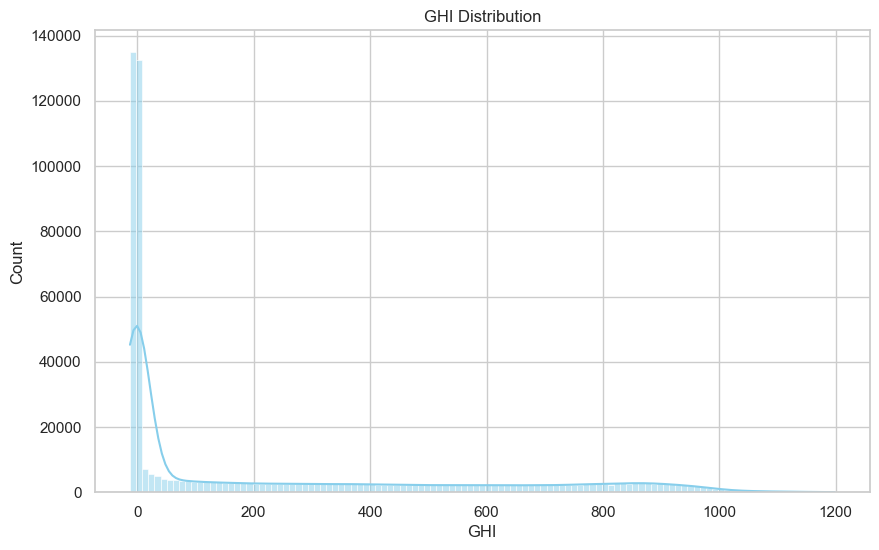

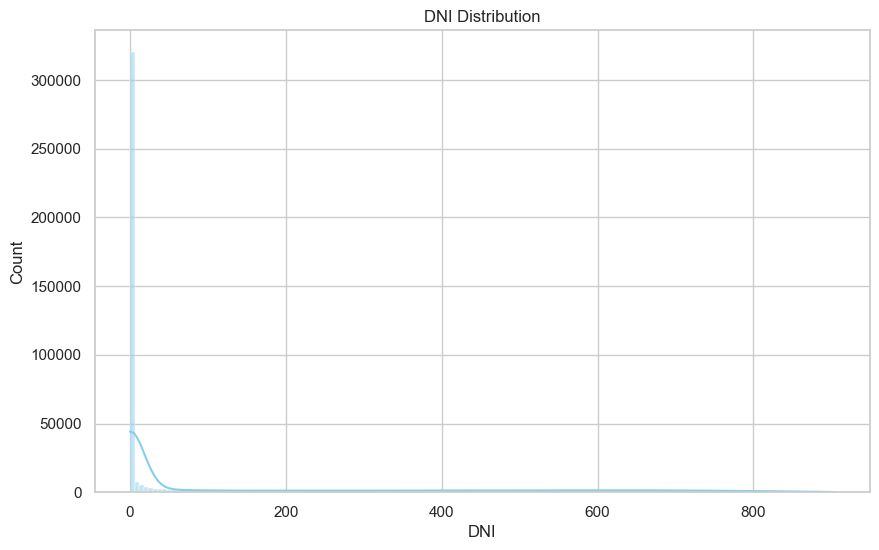

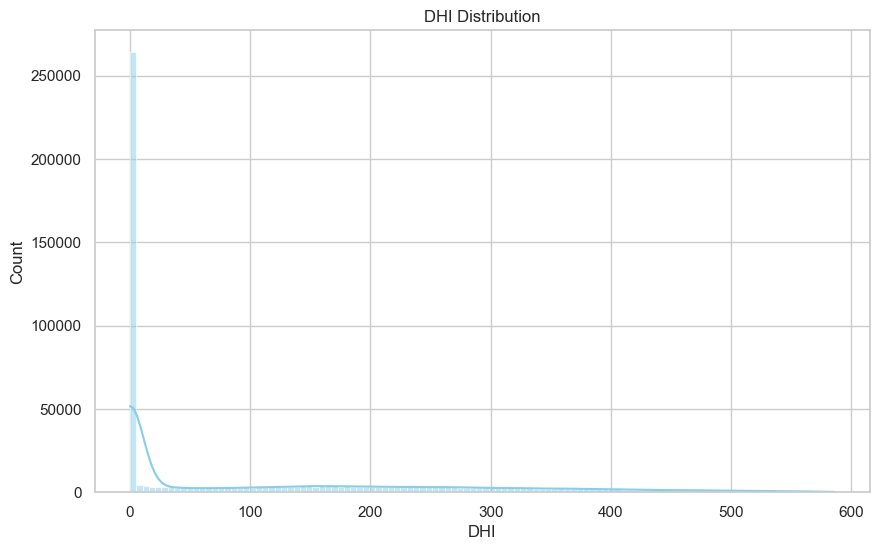

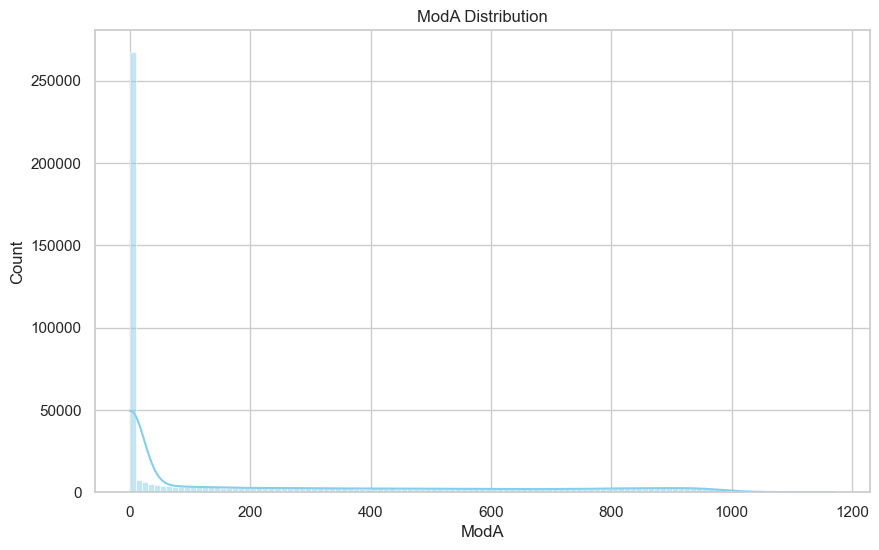

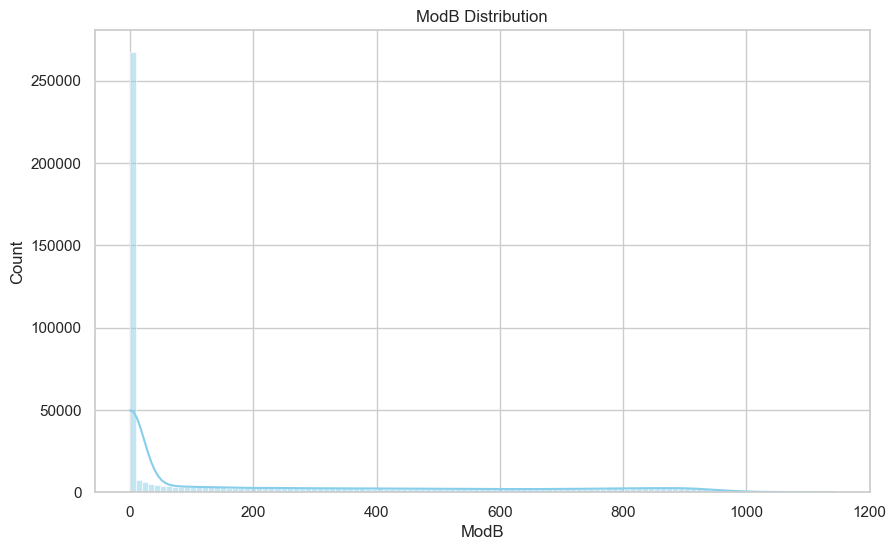

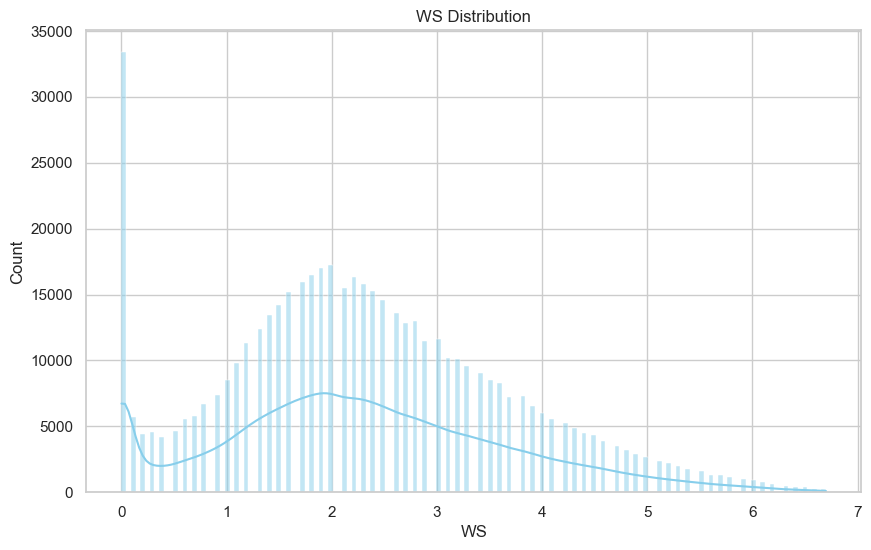

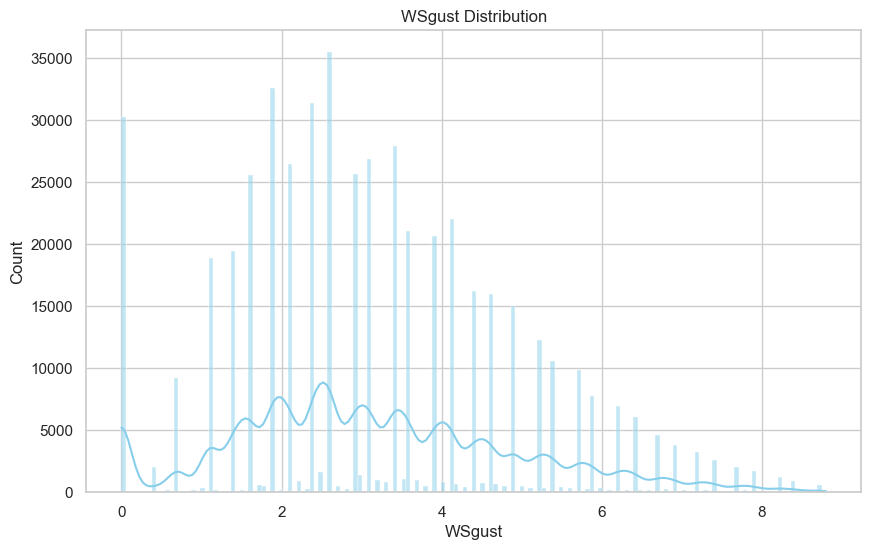

In [7]:
for col in cols:
    plt.figure()
    sns.histplot(df_clean[col], kde=True, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.show()

In [9]:
country_name = "togo"  # change this to match your dataset
output_path = f"{country_name}_clean.csv"
df_clean.to_csv(output_path, index=False)

print(f"\n✅ Cleaned dataset saved as {output_path}")


✅ Cleaned dataset saved as togo_clean.csv
